In [58]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import *
from lmfit.models import LorentzianModel

['Time (s)', 'Signal']


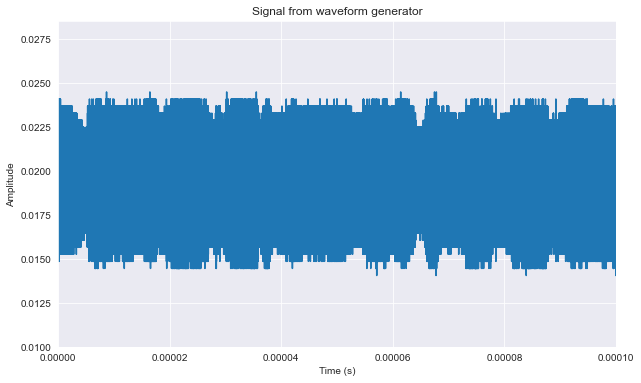

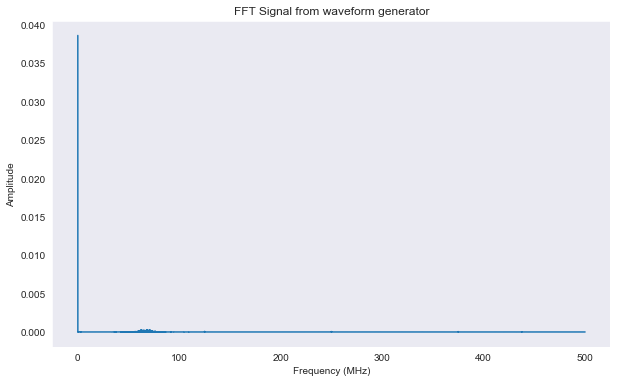

In [102]:
# Beat signal
sample=pd.read_csv(r'D:/Thesis 4th year/Oscilloscope/230219/J20t100ns.csv').iloc[0:,1:2]
nsamples = len(sample)

# ----------------
# Time
# ----------------
dt = 1.e-9
t = pd.Series([i*dt for i in range(nsamples)], name='Time (s)').T

df_sample = pd.DataFrame(t)
df_sample['Signal']=sample


header = list(df_sample.columns)
print(header)

fig1,ax1 = plt.subplots(figsize=(10,6))
ax1.plot(df_sample['Time (s)'],df_sample['Signal'],'-')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0,100e-6)
plt.title('Signal from waveform generator')
plt.show()

yf = fft(df_sample['Signal'].values)
xf = fftfreq(nsamples, dt)[:nsamples//2]

fig2,ax2 = plt.subplots(figsize=(10,6))
ax2.plot(xf*1e-6, 2.0/nsamples * np.abs(yf[0:nsamples//2]))
plt.title('FFT Signal from waveform generator')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude')
# plt.xlim(0,1e-9)
plt.grid()
plt.show()

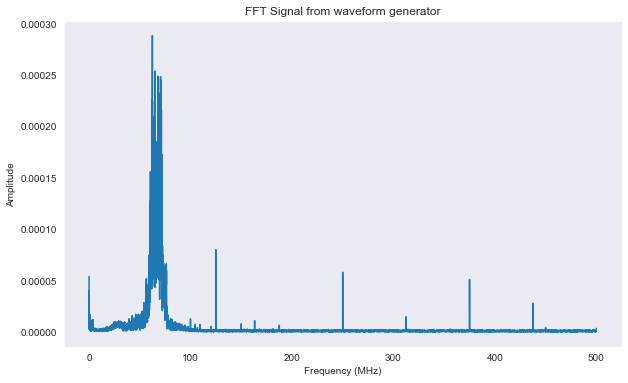

In [103]:
# Peakfinder

peaks, _ = find_peaks(2.0/nsamples * np.abs(yf[0:nsamples//2]))

peakfreq = pd.Series(xf[peaks]*1e-6,name='Frequency(MHz)')
peakamp = pd.Series(2.0/nsamples * np.abs(yf[0:nsamples//2])[peaks], name='Amplitude')

df_peak = pd.DataFrame(peakfreq)
df_peak['Amplitude']=peakamp

df_peak[df_peak.Amplitude > 0.00004]

fig3,ax3 = plt.subplots(figsize=(10,6))
# ax3.plot(df_peak['Frequency(MHz)'],df_peak['Amplitude'])
ax3.plot(peakfreq,peakamp)
plt.title('FFT Signal from waveform generator')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude')
# plt.xlim(0,1)
plt.grid()
plt.show()

In [105]:
df_peak

Frequency(MHz)  Amplitude
0            0.022888   0.000054
1            0.045776   0.000007
2            0.061035   0.000023
3            0.099182   0.000016
4            0.129700   0.000040
...               ...        ...
22043      499.870300   0.000001
22044      499.900818   0.000001
22045      499.938965   0.000002
22046      499.954224   0.000001
22047      499.977112   0.000004

[22048 rows x 2 columns]

In [107]:
xf[:8]-xf[1:9]

array([-7629.39453125, -7629.39453125, -7629.39453125, -7629.39453125,
       -7629.39453125, -7629.39453125, -7629.39453125, -7629.39453125])

In [108]:
xf[1]-xf[0]

7629.394531249999

In [6]:
import plotly.express as px
fig = px.line(xf*1e-6, 2.0/nsamples * np.abs(yf[0:nsamples//2]))
fig.show()

In [41]:
def FFT3(C,n,times):
    if times/500e-6==1: # 500us
        a=500
        text='u'
    elif times/10e-3==1: # 10ms
        a=10
        text='m'
    elif times/100e-9==1: # 100ns
        a=100
        text='n'
    elif times/1e-6==1: # 1us
        a=1
        text='u'
    else:
        print('No such file or directory')
    
    sample=pd.read_csv(r'D:/Thesis 4th year/Oscilloscope/230219/'+str(C)+''+str(n)+'t'+str(a)+''+str(text)+'s.csv').iloc[0:,1:2]
    print('file name: '+str(C)+''+str(n)+'t'+str(a)+''+str(text)+'s')
    
    nsamples = len(sample)
    
    if times == 500e-6:
        dt = 1.e-9 # 1/(1GSa/s) or 1/1.e9 
    elif times == 100e-9:
        dt = 1.e-9
    elif times == 1e-3:
        dt = 1/500.e6 #1/(500MSa/s)
    
    t = pd.Series([i*dt for i in range(nsamples)], name='Time (s)').T  
    df_sample = pd.DataFrame(t)
    df_sample['Signal']=sample
    header = list(df_sample.columns)
    
    sns.set_style("darkgrid")
    
    plt.figure(figsize=(15,7.5))
    plt.subplot(121)
    
    plt.plot(df_sample['Time (s)'],df_sample['Signal'],'-')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.xlim(0,100e-6)
    plt.title('Signal')
    
    yf = fft(df_sample['Signal'].values)
    xf = fftfreq(nsamples, dt)[:nsamples//2]
    
    # Peakfinder
    peaks, _ = find_peaks(2.0/nsamples * np.abs(yf[0:nsamples//2]))

    peakfreq = pd.Series(xf[peaks]*1e-6,name='Frequency(MHz)')
    peakamp = pd.Series(2.0/nsamples * np.abs(yf[0:nsamples//2])[peaks], name='Amplitude')

    df_peak = pd.DataFrame(peakfreq)
    df_peak['Amplitude']=peakamp
    df_peak[df_peak.Amplitude > 0.00000]
    
    plt.subplot(122)
    plt.plot(peakfreq,peakamp)
    plt.title('FFT Signal')
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    
    return peakfreq,peakamp

file name: J25t500us


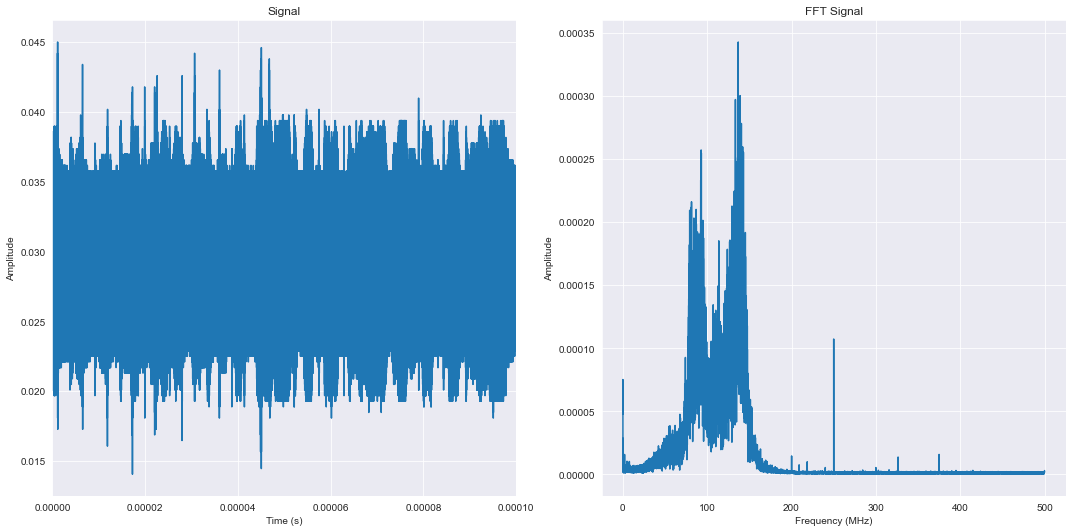

(0          0.015259
 1          0.038147
 2          0.053406
 3          0.068665
 4          0.091553
             ...    
 21727    499.885559
 21728    499.908447
 21729    499.946594
 21730    499.969482
 21731    499.984741
 Name: Frequency(MHz), Length: 21732, dtype: float64,
 0        0.000048
 1        0.000075
 2        0.000022
 3        0.000020
 4        0.000010
            ...   
 21727    0.000001
 21728    0.000002
 21729    0.000003
 21730    0.000003
 21731    0.000003
 Name: Amplitude, Length: 21732, dtype: float64)

In [67]:
FFT3('J',25,500e-6)
#FFT3('J',19,100e-9)

file name: J12t500us


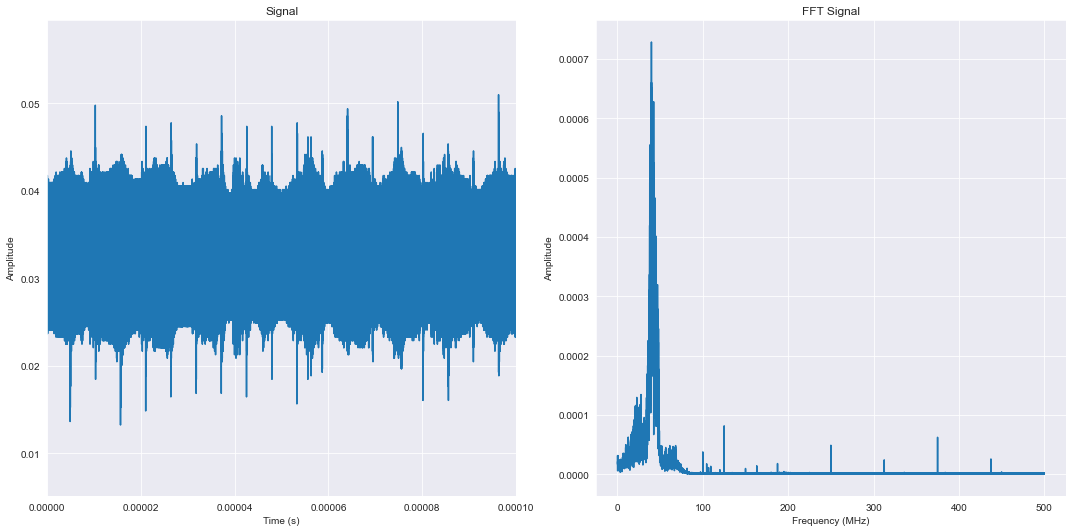

21949

In [37]:
l=FFT3('J',12,500e-6)
len(l[1])

In [91]:
def lff(l):
    x=l[0]
    X=x
    Y=l[1].values.flatten()
    mod = LorentzianModel()
    pars = mod.guess(Y, x=X)
    out = mod.fit(Y, pars, x=X)
    a=out.params['amplitude'].value
    c=out.params['center'].value
    s=out.params['sigma'].value
    f=out.params['fwhm'].value
    return a,c,s,f

def plotFFT(A,a,c,s,f):
    x=A[0]
    mu=c
    sigma=s
    fwhm=f
    lor=(a/(np.pi))*(sigma/((x-mu)**2+sigma**2))
    fig, ax = plt.subplots(figsize=(15, 9))
    plt.plot(A[0],A[1])
    plt.plot(A[0],lor,"--")
    plt.xlim(0,200)
    #linewidth=(0.0152587890625*10e6*fwhm) #600 data point
    #print('linewidth :',f,'MHz')
    return 

In [92]:
def FFTP(C,n,times):
    A=FFT3(C,n,times)
    A1=lff(FFT3(C,n,times))
    print('linewidth :',A1[3],'MHz')
    plotFFT(A,A1[0],A1[1],A1[2],A1[3])
    return

file name: J20t100ns


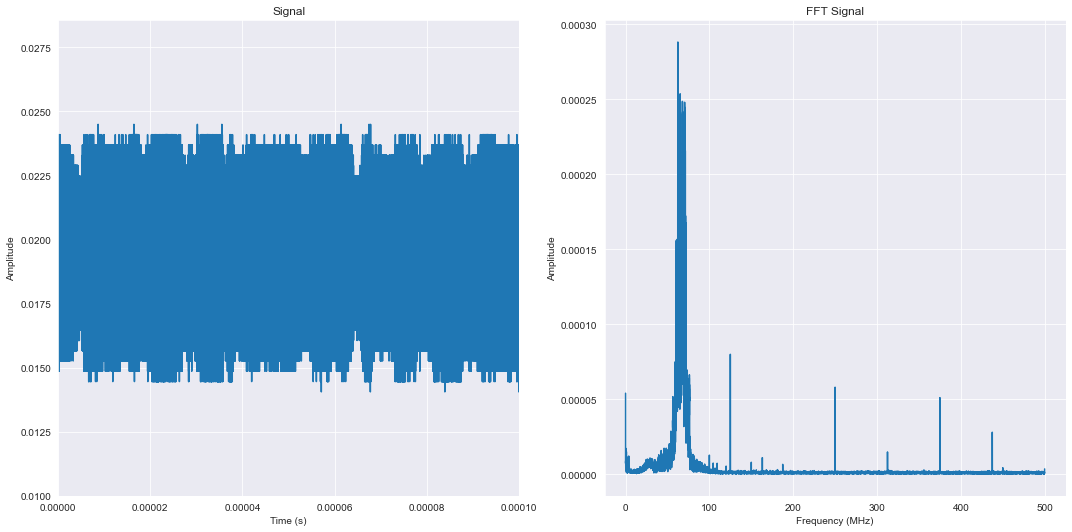

file name: J20t100ns


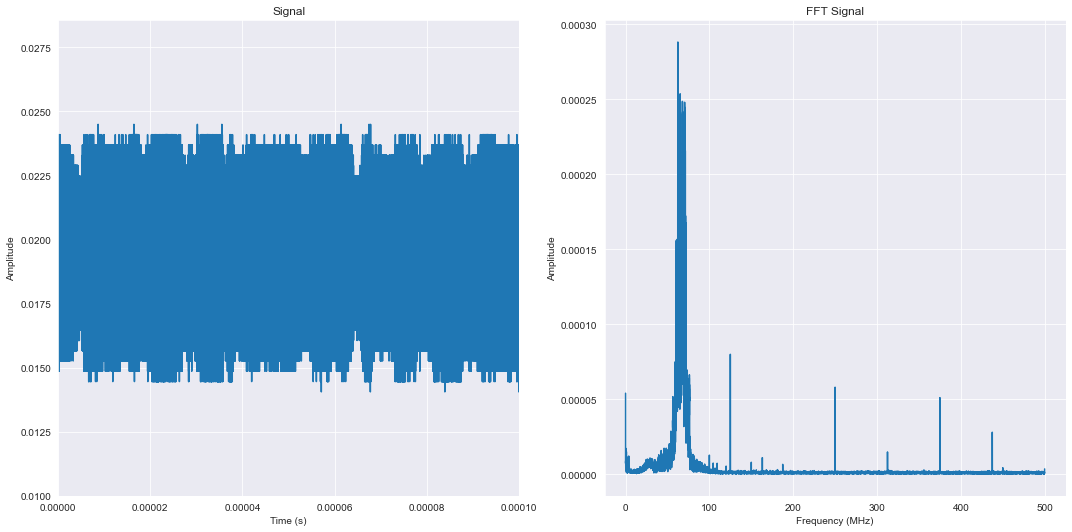

linewidth : 10.733599594350425 MHz


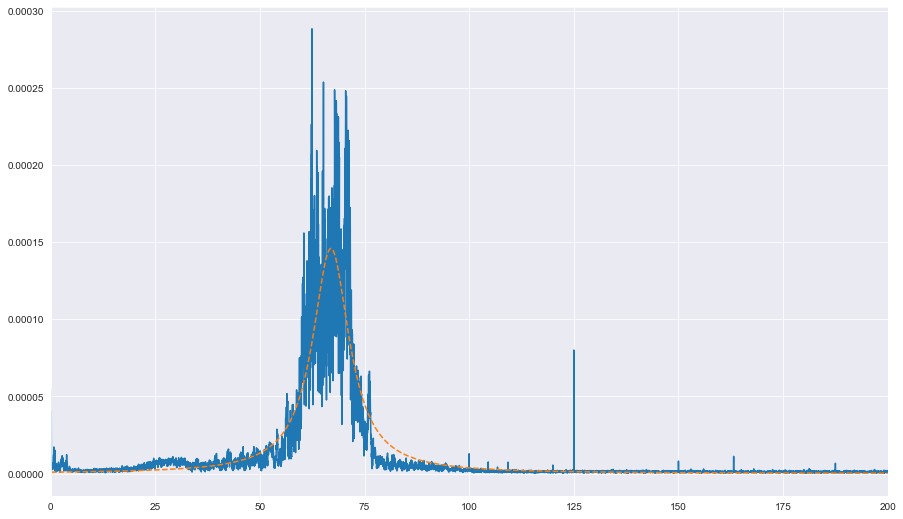

In [98]:
FFTP('J',20,100e-9)

In [111]:
0.045776-0.022888

0.022888